In [21]:
from d2l import torch as d2l
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/PJME_hourly.csv",index_col=[0],parse_dates=[0])
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


Text(0.5, 1.0, 'Hourly Energy Consumption data (2002-2018)')

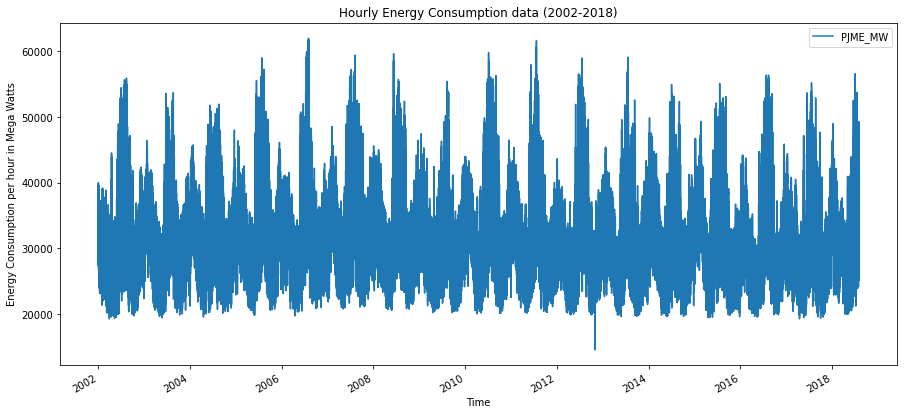

In [7]:
#Visualisation
df.plot(figsize=(15,7))
plt.xlabel("Time")
plt.ylabel("Energy Consumption per hour in Mega Watts")
plt.title("Hourly Energy Consumption data (2002-2018)")

In [8]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df["PJME_MW"]=scaler.fit_transform(df["PJME_MW"].values.reshape(-1,1))


Text(0.5, 1.0, 'Hourly Energy Consumption data (2002-2018)')

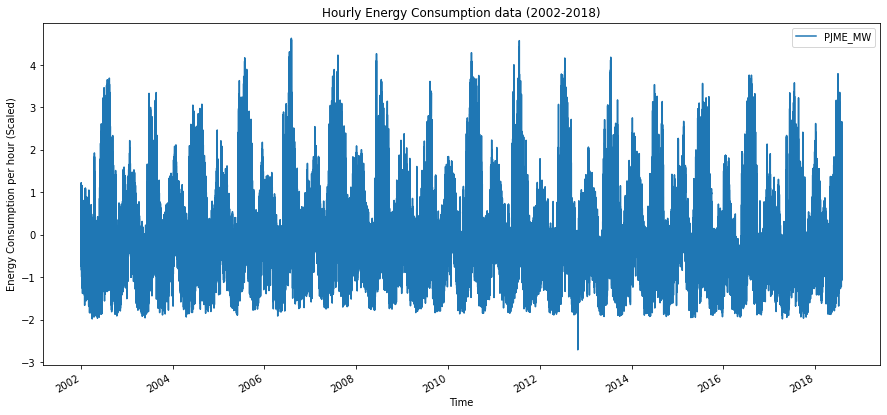

In [10]:
#visualisation after scaling
df.plot(figsize=(15,7))
plt.xlabel("Time")
plt.ylabel("Energy Consumption per hour (Scaled)")
plt.title("Hourly Energy Consumption data (2002-2018)")
#df shape =(145366, 1)

In [17]:
## 数据集
time=np.array(range(len(df)))
series=torch.from_numpy(np.array(df["PJME_MW"]))

In [18]:
split=105000
x_train=series[:split]
time_train=time[:split]
x_test=series[split:]
time_test=time[split:]

#x_train.shape=(105000,)

In [19]:
window_size=32
batch_size=64
shuffle_buffer_size=5000

features = torch.zeros((split -window_size), window_size)
for i in range(window_size):
    features[:, i] = (x_train[i: split - window_size + i])#广播？
#  features[:,0] = x[0: 1000-4+0] 第一列数据 对features第一列进行操作 996*1  等于序列从0-T-4+0（0-996）
#  features[:,1] = x[1: 1000-4+1]
#  features[:,2] = x[2: 1000-4+2]
#  features[:,3] = x[3: 1000-4+3]
# label = [4:1000]     (-1,1)自动另一个维度推断出来 (996*1)
labels = torch.reshape(x_train[window_size:], (-1,1))

train_iter = d2l.load_array((features[:split], labels[:split]),
                            batch_size, is_train=True)

In [ ]:
model = torch.nn.Sequential(
    nn.LSTM(64,)
)